In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")

# View data
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [3]:
df.describe()


,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [4]:
category_sales = df.groupby("Category")["Sales"].sum()
category_sales


Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

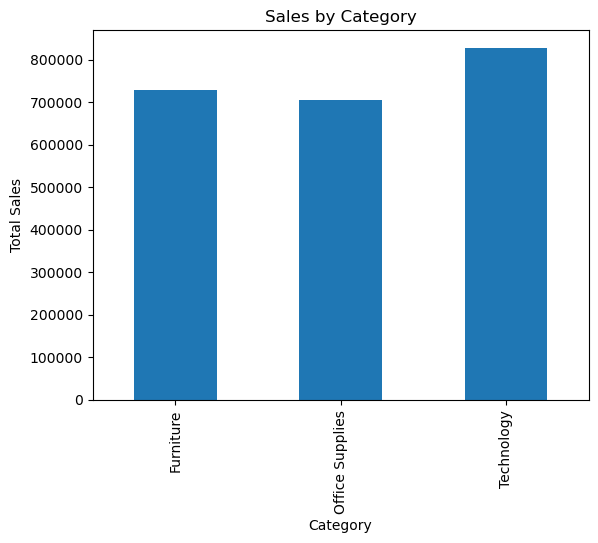

In [5]:
category_sales.plot(kind="bar", title="Sales by Category")
plt.ylabel("Total Sales")
plt.show()


In [7]:
region_sales= df.groupby("Region")["Sales"].sum()
region_sales

Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64

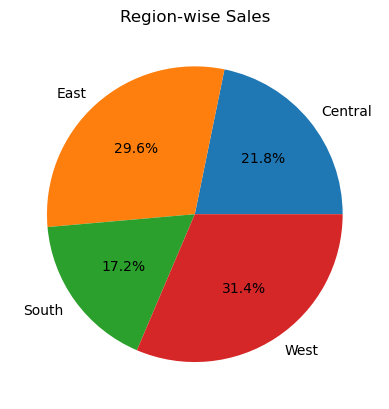

In [10]:
region_sales.plot(kind="pie", autopct="%1.1f%%", title="Region-wise Sales")
plt.ylabel("")
plt.show()


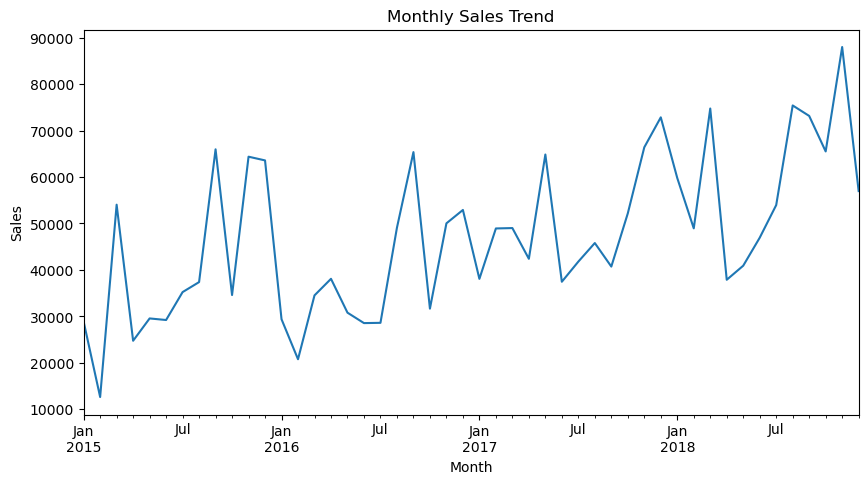

In [11]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="mixed")

df["Month"] = df["Order Date"].dt.to_period("M")

monthly_sales = df.groupby("Month")["Sales"].sum()

monthly_sales.plot(kind="line", figsize=(10,5), title="Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


In [12]:
top_customers = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)
top_customers


Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64

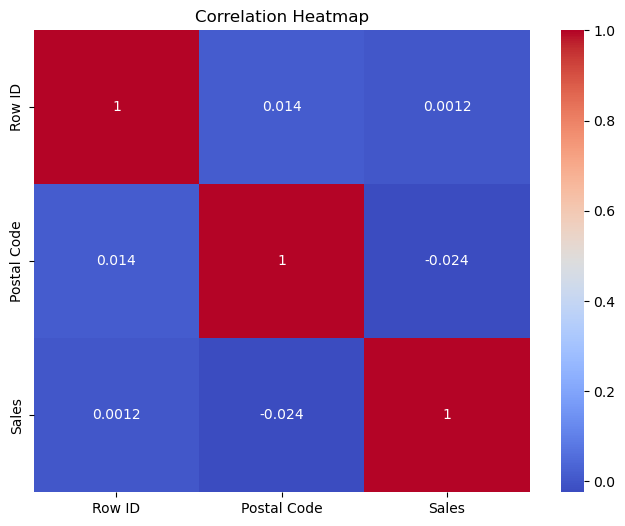

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names
df.columns = df.columns.str.strip()

# Create numeric dataframe
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
